# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

Загрузим данные

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits_dataset = load_digits()
images = digits_dataset.data
labels = digits_dataset.target

Разделим на обучающую и тестовую части:

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Соберем данные о точности

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

k_range = range(1, 21);

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images, train_labels)

    train_predictions = knn.predict(train_images)
    test_predictions = knn.predict(test_images)

    train_accuracy = accuracy_score(train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

Нарисуем графики

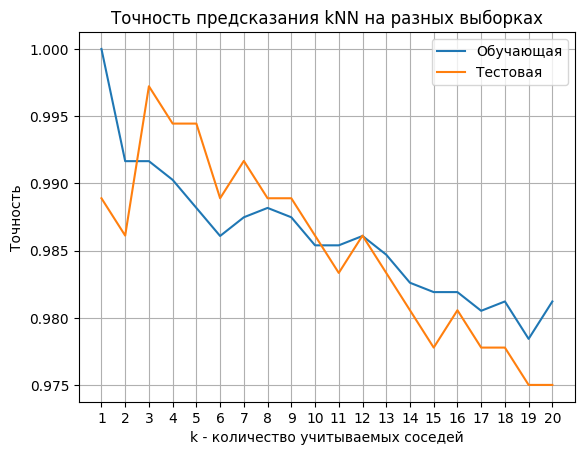

In [ ]:
plt.plot(k_range, train_accuracies, label='Обучающая')
plt.plot(k_range, test_accuracies, label='Тестовая')
plt.xlabel('k - количество учитываемых соседей')
plt.ylabel('Точность')
plt.title('Точность предсказания kNN на разных выборках')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** На обучающей выборке каждая точка - ближайший к себе сосед. Если учитывается только она, то получаем 100% точности

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

Получим данные для новой метрики:

In [ ]:
l1_train_accuracies = []
l1_test_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(train_images, train_labels)

    train_predictions = knn.predict(train_images)
    test_predictions = knn.predict(test_images)

    train_accuracy = accuracy_score(train_labels, train_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    l1_train_accuracies.append(train_accuracy)
    l1_test_accuracies.append(test_accuracy)

Строим общий график:

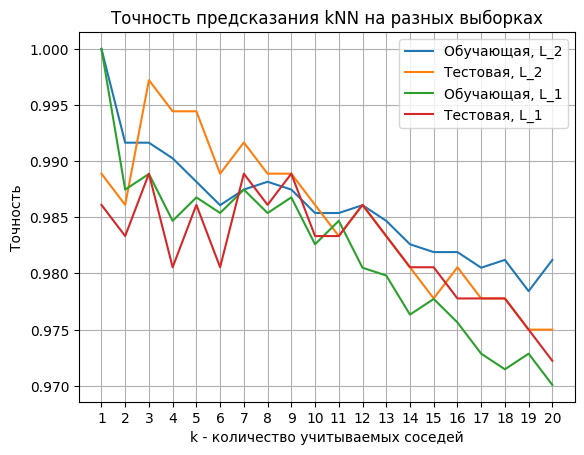

In [ ]:
plt.plot(k_range, train_accuracies, label='Обучающая, L_2')
plt.plot(k_range, test_accuracies, label='Тестовая, L_2')
plt.plot(k_range, l1_train_accuracies, label='Обучающая, L_1')
plt.plot(k_range, l1_test_accuracies, label='Тестовая, L_1')
plt.xlabel('k - количество учитываемых соседей')
plt.ylabel('Точность')
plt.title('Точность предсказания kNN на разных выборках')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Изменили метрику => изменились ближайшие соседи

**Выводы:** Оба гиперпараметра влияют на точность полученной модели. Больше эта разница проявляется на тестовой выборке. L_2 при большей части k от 1 до 20 выдает более точные результаты.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [ ]:
import pandas as pd
import os

titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [ ]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [ ]:
print(f'{X.isna().any(axis=1).sum()} объект(-а/-ов) имеют пропуски')
X = X.dropna()
y = y.dropna()

X, y = titanic[features_columns], titanic[target_column]

177 объект(-а/-ов) имеют пропуски


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

<Figure size 1200x600 with 0 Axes>

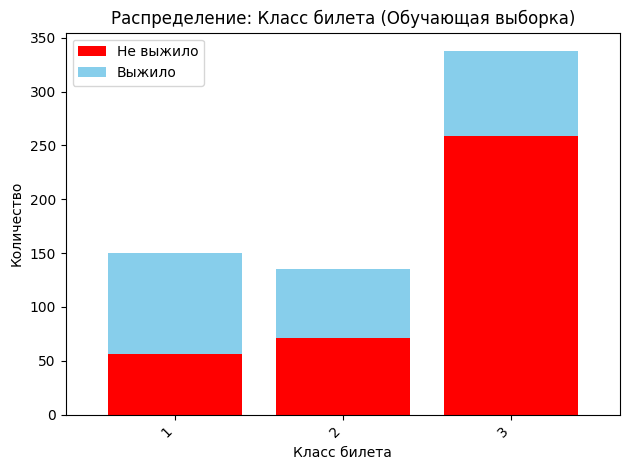

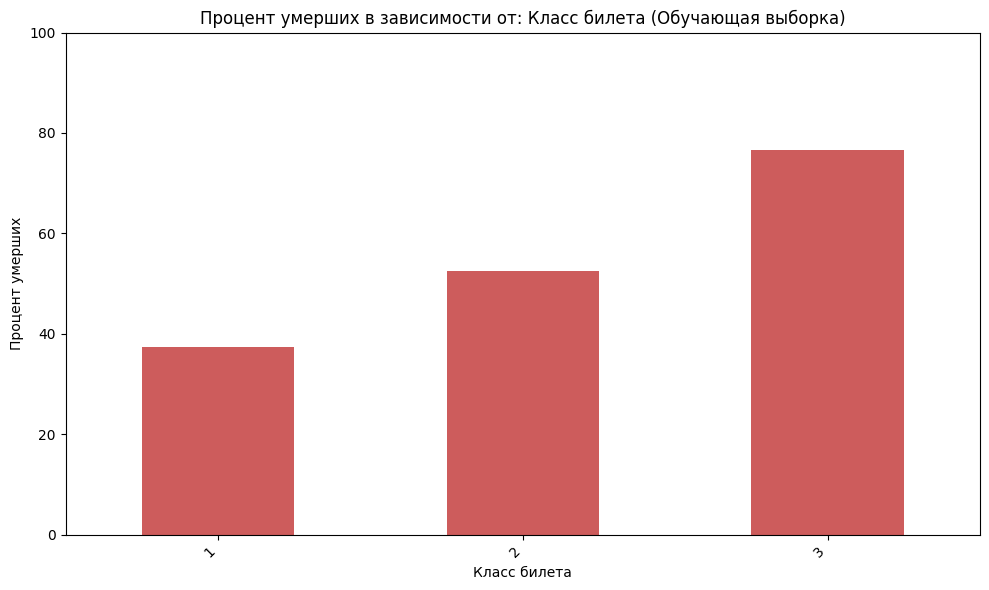

<ipython-input-187-00303fbe5dd3>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = train_df.groupby([feature, 'Survived']).size().unstack()


<Figure size 1200x600 with 0 Axes>

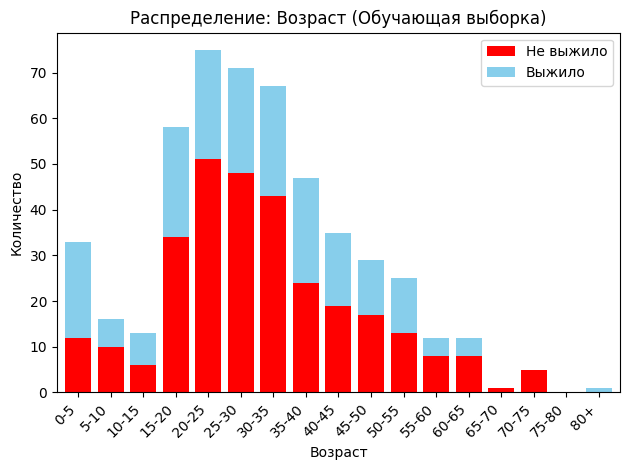

<ipython-input-187-00303fbe5dd3>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_rate = 100 - (train_df.groupby(feature)['Survived'].mean() * 100)


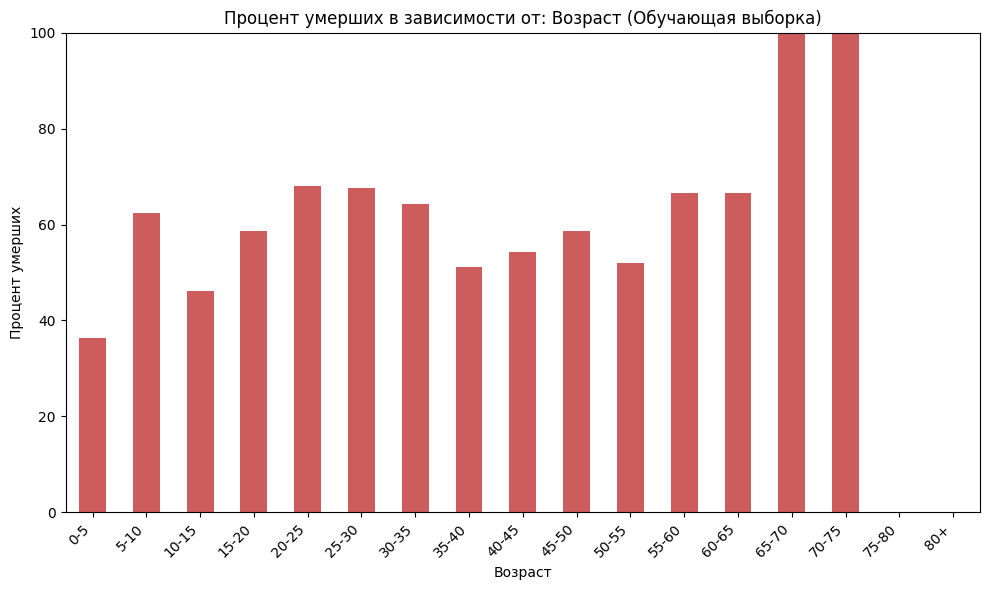

<Figure size 1200x600 with 0 Axes>

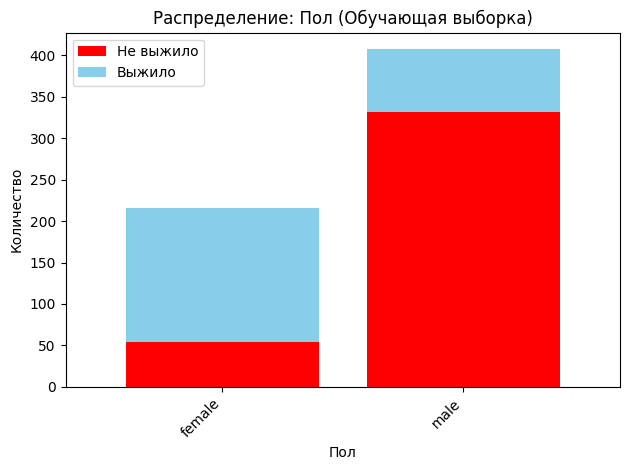

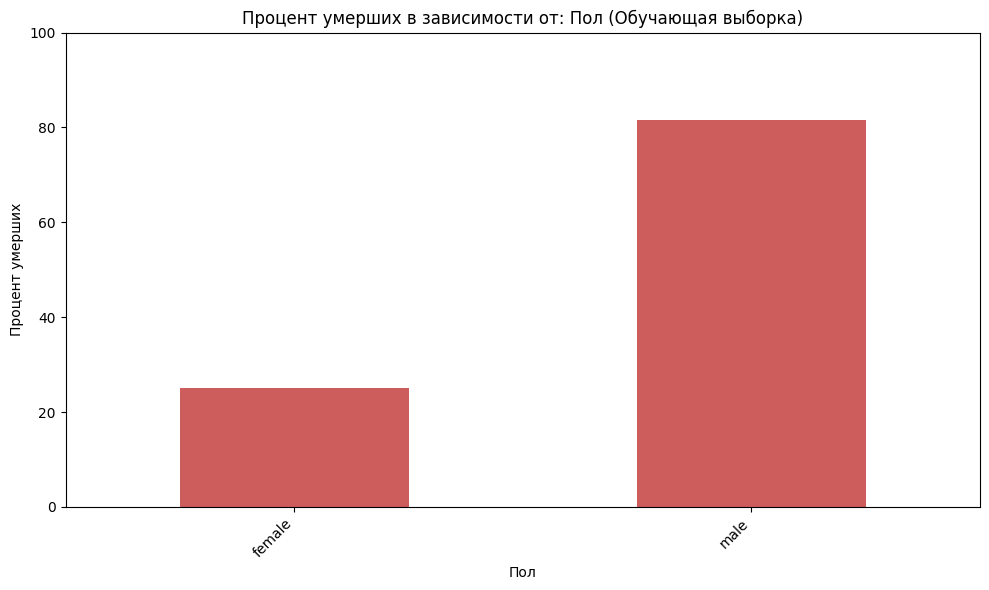

<Figure size 1200x600 with 0 Axes>

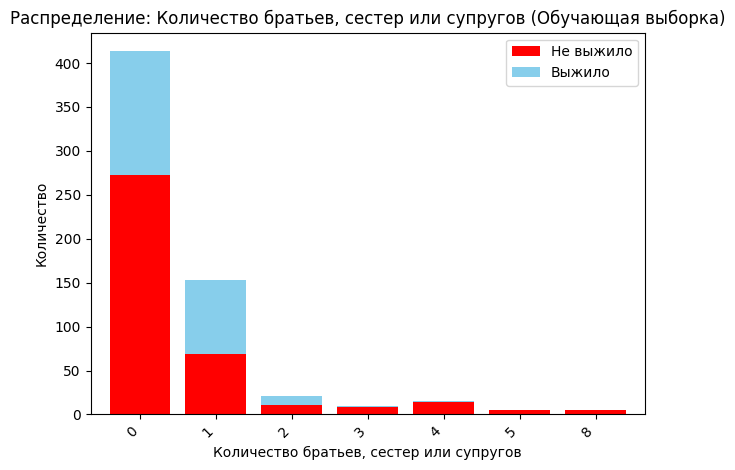

<Figure size 1200x600 with 0 Axes>

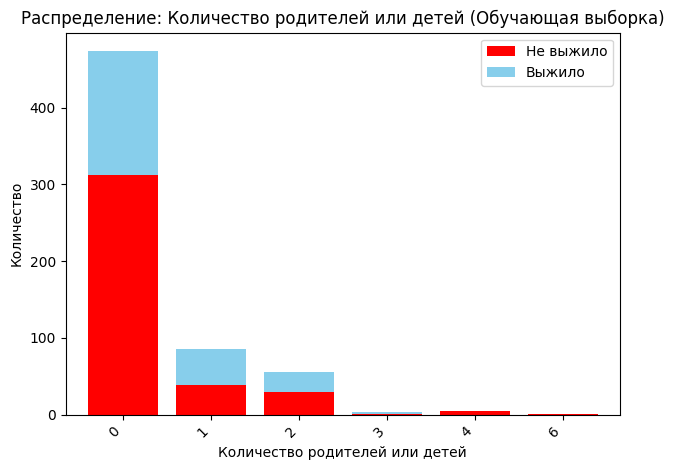

<ipython-input-187-00303fbe5dd3>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = train_df.groupby([feature, 'Survived']).size().unstack()


<Figure size 1200x600 with 0 Axes>

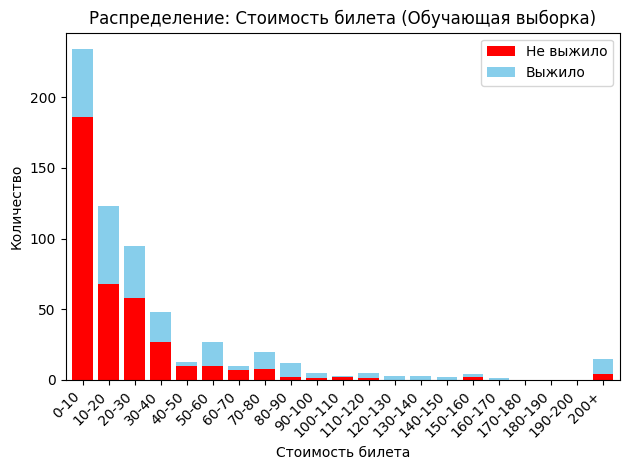

<ipython-input-187-00303fbe5dd3>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_rate = 100 - (train_df.groupby(feature)['Survived'].mean() * 100)


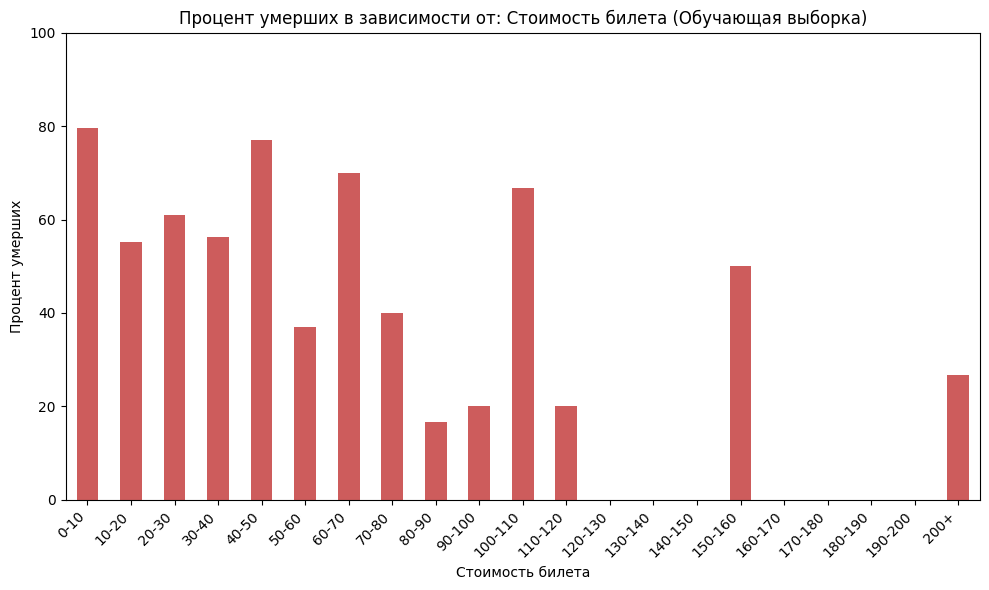

In [ ]:
train_df = pd.concat([train_X, train_y], axis=1)

# для раскраски
train_df['Group'] = 'Всего'
train_df.loc[train_df['Survived'] == 0, 'Group'] = 'Не выжило'

# binning
# Age
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100]
age_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80+']
train_df['Age_Binned'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Fare
fare_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 1000]
fare_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180', '180-190', '190-200', '200+']

train_df['Fare_Binned'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Словари для подписей
feature_names = {
    "Pclass": "Класс билета",
    "Age_Binned": "Возраст",
    "SibSp": "Количество братьев, сестер или супругов",
    "Parch": "Количество родителей или детей",
    "Fare_Binned": "Стоимость билета",
    'Age': "Возраст",
    "Fare": 'Стоимость билета',
    "Sex": "Пол"
}

# Список признаков
features = ["Pclass", "Age_Binned", "Sex", "SibSp", "Parch", "Fare_Binned"]
features_for_mortality = ["Pclass", "Age_Binned", "Sex", "Fare_Binned"]

# Цикл по признакам
for feature in features:
    # 1. График распределения (количество)
    plt.figure(figsize=(12, 6))
    grouped_data = train_df.groupby([feature, 'Survived']).size().unstack()
    grouped_data.fillna(0).plot(kind='bar', stacked=True, color=['red', 'skyblue'], rot=0, width=0.8)
    plt.title(f'Распределение: {feature_names[feature]} (Обучающая выборка)')
    plt.xlabel(feature_names[feature])
    plt.ylabel('Количество')
    plt.legend(labels=['Не выжило', 'Выжило'], loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    if feature not in features_for_mortality:
      continue;

    # 2. График процента умерших
    plt.figure(figsize=(10, 6))
    mortality_rate = 100 - (train_df.groupby(feature)['Survived'].mean() * 100)
    mortality_rate.plot(kind='bar', color='indianred', rot=0)
    plt.title(f'Процент умерших в зависимости от: {feature_names[feature]} (Обучающая выборка)')
    plt.xlabel(feature_names[feature])
    plt.ylabel('Процент умерших')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

 По графикам распределения SibSp и Parch заметно, что при значении 0 шанс смерти повышен. Поэтому если оба они 0 - то, вероятно, пассажир мертв.

 На графике процента смертности видно, что около 80% пассажиров с ценой билета <=10 мертвы.

 По графику зависимости процента смертности от возраста я заметил, что все пассажиры возраста >65 мертвы.

**Дерево 2:**

 По графику зависимости процента смертности от пола видно, что этот признак хорошо кореллирует с выживаемостью. Женщины обычно выживают, мужчины - нет.

Реализуйте полученные деревья по шаблону

In [ ]:
def tree(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    predicted = pd.Series([1] * len(features), index=features.index)

    mask_family = (features["SibSp"] == 0) & (features["Parch"] == 0)
    predicted[mask_family] = 0

    mask_fare2 = (features['Fare'] <= 10)
    predicted[mask_fare2] = 0

    mask_age = (features['Age'] > 65)
    predicted[mask_age] = 0


    return predicted

def tree2(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    """

    predicted = pd.Series([0] * len(features), index=features.index)

    mask_sex = (features['Sex'] == 'female')
    predicted[mask_sex] = 1

    ...
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    correct_predictions = (target == predicted)

    return correct_predictions.sum() / len(correct_predictions)

In [ ]:
test_predictions1 = tree(test_X)
test_accuracy1 = accuracy(test_y, test_predictions1)
print(f"Accuracy (дерево 1, тест): {test_accuracy1:.4f}")


test_predictions2 = tree2(test_X)
test_accuracy2 = accuracy(test_y, test_predictions2)
print(f"Accuracy (дерево 2, тест): {test_accuracy2:.4f}")

Accuracy (дерево 1, тест): 0.6306
Accuracy (дерево 2, тест): 0.7724


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Очень мало людей обладают высокими значениями этого параметра, поэтому в зонах с высокими значениями будет мало точек и будет недостаточно данных для метода ближайшего соседа. У  `'Pclass'` такой проблемы нет, для каждого значения найдется достаточно много людей

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




Загрузка, предобработка, разделение данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

titanic = pd.read_csv("train.csv")
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)
titanic = titanic.dropna()

features_columns = ["Pclass", "Age", "Sex_male", "Fare"]
target_column = "Survived"

X, y = titanic[features_columns], titanic[target_column]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

Обучение и оценка качества

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X, train_y)

predicted = knn.predict(test_X)
accuracy = accuracy_score(test_y, predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8364


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [ ]:
for feature in features_columns:
    print(f"Признак: {feature}")
    print(f"Минимальное значение: {train_X[feature].min()}")
    print(f"Максимальное значение: {train_X[feature].max()}")
    print()

Признак: Pclass
Минимальное значение: 1
Максимальное значение: 3

Признак: Age
Минимальное значение: 0.92
Максимальное значение: 80.0

Признак: Sex_male
Минимальное значение: False
Максимальное значение: True

Признак: Fare
Минимальное значение: 5.0
Максимальное значение: 263.0



Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  При вычислении метрики разный пол эквивалентен, например, разнице в 1 год, хотя это, очевидно, неравные отличия между объектами. То есть, признаки с большим диапазонам данных вносят больший вклад


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Выбросы сильно могут влиять на минимумы и максимумы. И возможно, некоторые признаки более или менее важны, и их нужно нормировать на другой диапазон


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [ ]:
print("X_train_scaled (NumPy array):")
print("Минимумы по столбцам:", train_X_scaled.min(axis=0))  # axis=0 - вычисление по столбцам
print("Максимумы по столбцам:", train_X_scaled.max(axis=0))

X_train_scaled (NumPy array):
Минимумы по столбцам: [0. 0. 0. 0.]
Максимумы по столбцам: [1. 1. 1. 1.]


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X_scaled, train_y)

predicted = knn.predict(test_X_scaled)
accuracy = accuracy_score(test_y, predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7818


**Вывод:** Вернувшись к графикам, мы можем заметить, что основная часть значений Fare распологается в куда меньшем диапазоне - примерно [0, 80]. А мы считали, что максимум 260, сжали слишком сильно - поэтому точность снизилась.

# <!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

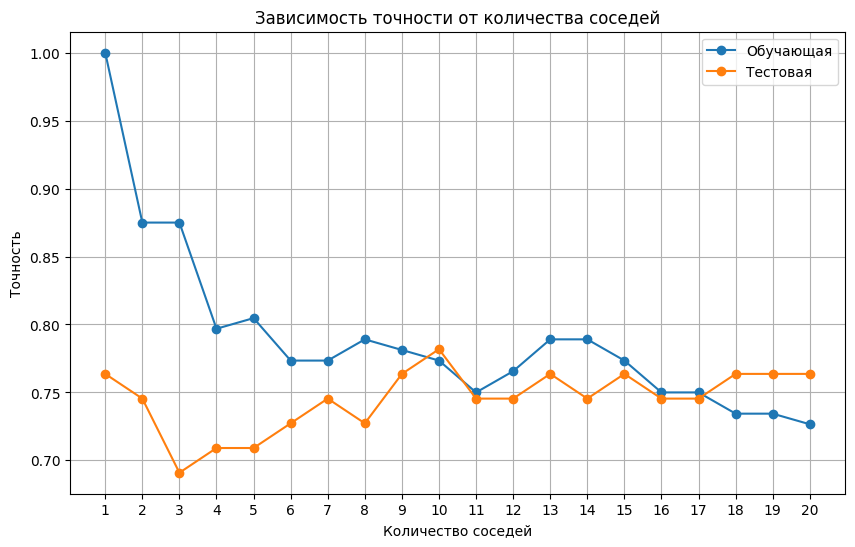

Лучшее значение k по accuracy на тестовой выборке: 10
Максимальная accuracy на тестовой выборке: 0.7818


In [ ]:
k_range = range(1, 21)

# Списки для хранения значений accuracy
train_accuracy = []
test_accuracy = []

for k in k_range:
    # Создаем и обучаем модель k-NN с текущим значением k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_scaled, train_y)

    # Вычисляем accuracy на обучающей выборке
    predicted = knn.predict(train_X_scaled)
    train_acc = accuracy_score(train_y, predicted)
    train_accuracy.append(train_acc)

    # Вычисляем accuracy на тестовой выборке
    predicted = knn.predict(test_X_scaled)
    test_acc = accuracy_score(test_y, predicted)
    test_accuracy.append(test_acc)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracy, label='Обучающая', marker='o')
plt.plot(k_range, test_accuracy, label='Тестовая', marker='o')
plt.title('Зависимость точности от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

# Находим k с максимальной точностью на тестовой выборке.
best_k = k_range[test_accuracy.index(max(test_accuracy))]
print(f"Лучшее значение k по accuracy на тестовой выборке: {best_k}")
print(f"Максимальная accuracy на тестовой выборке: {max(test_accuracy):.4f}")

**Вывод:** Сначала точность на обучающей выборке падает, а на тестовой растет - то есть модель переобучается при k <= 6. Далее графики обучающей и тестовой выборки становятся примерно одинаковыми